## I denna kodcell placeras modulimporter och egendefinerade funktioner som används i flera deluppgifter

In [1]:
# moduler
import csv
import matplotlib.pyplot as plt

# Funktion som läser csv fil, lägger varje rad i data och returnerar innehållet (data) som lista
def read_file(file_name):
  with open(file_name, mode = 'r', encoding = 'UTF-8') as file:
    csv_reader = csv.reader(file, delimiter=';')
    data = []
    for line in csv_reader:
      data.append(line)
    return data


## Deluppgift 1
Ev. kommentar:

In [ ]:
# Listor för att tilldela innehållet i filerna
lgh_data = read_file('lghpriser.csv')
villa_data = read_file('villapriser.csv')
# För att skriva ut tre rader ur filerna. loop för att ta de tre första raderna, index nr 0,1,2
i = 0
while i < 3:
    print(lgh_data[i])
    print(villa_data[i])
    i = i + 1


## Deluppgift 2
Ev. kommentar:

Ange prisområde (1-4):
2
Ange årtalet som ska presenteras (2018-2023):
2019
['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'dec']
[85.72, 75.64, 66.96, 64.9, 63.59, 45.3, 57.43, 61.64, 57.96, 61.67, 67.05, 58.82]


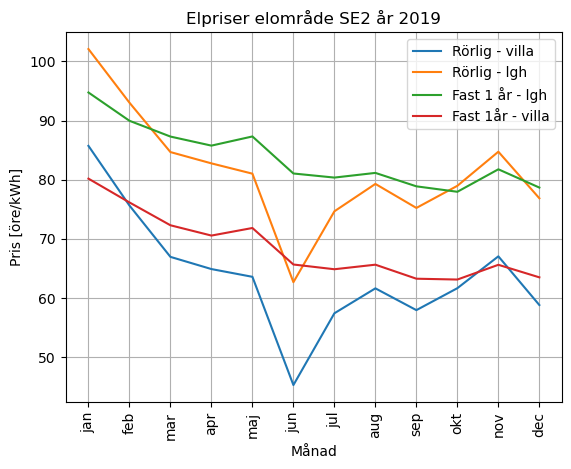

In [3]:
# Be användaren ange vad som ska visas i diagrammet
print('Ange prisområde (1-4):')
input1 = input()
print('Ange årtalet som ska presenteras (2018-2023):')
input2 = input()

title = 'Elpriser elområde SE' + input1 +' år ' + input2
# Listor
lghpriser = []
villapriser = []
lghpriser = read_file('lghpriser.csv')
villapriser = read_file('villapriser.csv')
x_1 = []
y_1 = []
x_2 = []
y_2 = []
x_3 = []
y_3 = []
x_4 = []
y_4 = []
# Iterar genom lghpriser lista för valt år
for lines in lghpriser:
    if lines[0] == input2:
        #Fast pris. i - för att hämta vid rätt index 
        i = 3*int(input1)
        x_1.append(lines[1][0:3])
        y_1.append(float(lines[-1 + i]))
        #Rörligt pris
        x_2.append(lines[1][0:3])
        y_2.append(float(lines[1 + i]))
# Iterar genom villapriser lista för valt år
for lines in villapriser:
    if lines[0] == input2:
        #Fast pris
        i = 3*int(input1)
        x_3.append(lines[1][0:3])
        y_3.append(float(lines[-1 + i]))
        #Rörligt pris
        x_4.append(lines[1][0:3])
        y_4.append(float(lines[1 + i]))
        
# Skapar diagram  
print(x_4)
print(y_4)
plt.plot(x_4,y_4,label='Rörlig - villa')
plt.plot(x_2,y_2,label='Rörlig - lgh')
plt.plot(x_1,y_1, label='Fast 1 år - lgh')
plt.plot(x_3,y_3,label='Fast 1år - villa')
plt.xlabel('Månad')
plt.ylabel('Pris [öre/kWh]')
plt.legend(loc='best')
plt.title(title)
plt.xticks(rotation=90)
plt.grid()
plt.show()

## Deluppgift 3
Ev. kommentar:

Ska analys göras för villa (V) eller lägenhet (L) ?
V
Välj vilket årtal som ska analyseras (2018-2023)
2021


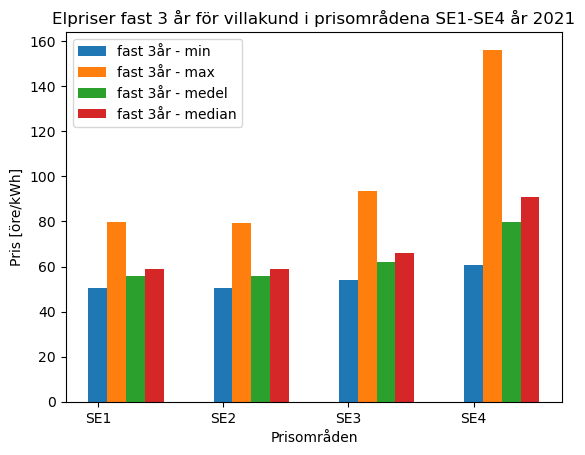

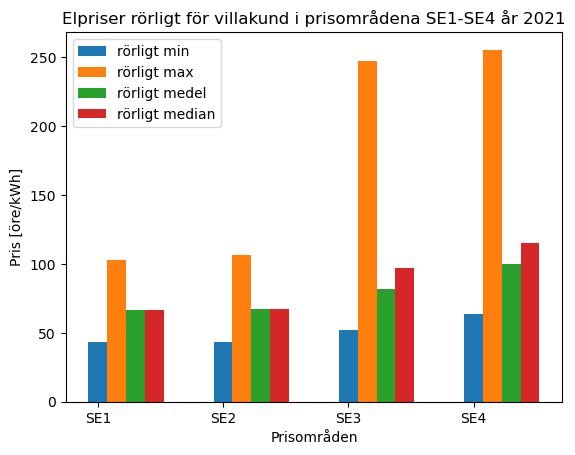

                   Rörlig pris (öre/kWh)                             Fast pris 3år (öre/kWh)
Omr    min    (mån)     max    (mån)   median   medel   |   min    (mån)   max     (mån)     median     medel 
------------------------------------------------------------------------------------------------------------------
SE1   50.34    feb   79.61      dec     55.7    59.09    43.21      feb    102.85    dec      66.47     66.68 
SE2    50.5    feb    79.1      dec    55.66    58.91    43.29      feb    106.65    dec      66.92     67.17 
SE3   54.01    feb   93.42      dec    61.94     65.8    52.06      feb    247.48    dec      82.14     97.12 
SE4   60.74    feb   156.2      dec    79.68    90.92     63.8      feb    255.39    dec     100.06    115.43 
------------------------------------------------------------------------------------------------------------------


In [4]:
# returnera medelvärde i en lista
def avg_value(list):
    sum_val = 0
    count = 0
    #iterar genom lista, lägg til varje värde i sum_val, vid varje iteration öka count med 1 för medelvärde beräk
    for i in list:
        sum_val = sum_val + i
        count += 1
    avg_val = (sum_val / count)
    avg_val = float(round(avg_val, 2))
    return avg_val
# returnera medianen i en lista
def med_value(list):
    #för att sortera lista, count = längden av lista
    list.sort()
    count = len(list)
    # om antal nummer (count) är jämnt. delar och rundar ner de två mittersta värdena, adderar och delar med 2
    if count % 2 == 0:
        a = list[count//2-1]
        b = list[count//2]
        med_val = (a+b)/2
        return float(round(med_val, 2))
    #om antal nummer inte är jämnt, ta mittersta siffran
    else:
        med_val = list[count//2]
        return med_val

#listor
data = []
min_bar = []
min_list = []
max_list = []
med_list = []
avg_list = []
min_month = []
max_month = []
table_list = []
se_1 = []
se_2 = []
se_3 = []
se_4 = []
lghData = read_file('lghpriser.csv')
villaData = read_file('villapriser.csv')
# Låt användare välja Villa eller Lgh och årtal
print('Ska analys göras för villa (V) eller lägenhet (L) ?')
input1 = input()
print('Välj vilket årtal som ska analyseras (2018-2023)')
input2 = input()

#prisområden
priceAreas = ('SE1','SE2','SE3','SE4')
# bredd för bars
width = 0.15

# Om anv väljer 1 - data=villapriser, annars om 2 - data=lghpriser 
if input1 == 'V':
    data = read_file('villapriser.csv')
    customer = 'villakund'
elif input1 == 'L':
    data = read_file('lghpriser.csv')
    customer = 'lägenhetskund'
# lista, st och lexikon 
area_se = []
areas = ''
dict_f = {}
dict_r = {}
# Loopa igenom varje månad (12) i data, lägger in element som värde i lexikon, månad (lines[1]) är nyckel 
for lines in data:
    if lines[0] == input2:
        dict_f[lines[1]] = [float(lines[3]), float(lines[6]),float(lines[9]), float(lines[12])]
        dict_r[lines[1]] = [float(lines[4]), float(lines[7]),float(lines[10]), float(lines[13])]
# funktion- tar fram min värde och lägger i min_list. kommer loopa genom lexikon, min_v ersätts med värde i lexikon om mindre än befintlig       
def min_val(type_deal):
    min_v = 1000
    i = 0
    while i < 4:
        for key in type_deal:
            if type_deal[key][i] < min_v:
                min_v = type_deal[key][i]
                min_k = key
                min_kv = {min_k: min_v}  
        min_list.append(min_kv[min_k])
        min_month.append(min_k[0:3])
        i = i + 1
        min_v = 1000
# funktion- tar fram max värde och lägger i min_list. kommer loopa genom lexikon, max_v ersätts med värde i lexikon om större än befintlig       
def max_val(type_deal):
    max_v = -1000
    i = 0
    while i < 4:
        for key in type_deal:
            if type_deal[key][i] > max_v:
                max_v = type_deal[key][i]
                max_k = key
                max_kv = {max_k: max_v}  
        max_list.append(max_kv[max_k])
        max_month.append(max_k[0:3])
        i = i + 1
        max_v = -1000  

# anropar funktionerna för min och max värde, använder lexikon (dict_f) som argument
min_val(dict_f)
max_val(dict_f)
# Funktion - tar lägger till median, avg av parametern i respektive lista
def append_val(se):
    med_list.append(med_value(se))
    avg_list.append(avg_value(se)) 
    return med_list, avg_list

i=0
# Iterar genom data, specifikt år (input2), lägger till rad i område (se_#) Fast 3 år
for lines in data:
    if lines[0] == input2:
        se_1.append(float(lines[3]))
        se_2.append(float(lines[6]))
        se_3.append(float(lines[9]))
        se_4.append(float(lines[12]))
        
# anropar append_val() funktion, tar område som argument (parameter)
append_val(se_1)
append_val(se_2)
append_val(se_3)
append_val(se_4)

# iterera så länge i < längden av priceAreas, lägg till "i" värde i min_bar vid varje iteration
i = 0   
while i < len(priceAreas):
        min_bar.append(i)
        i=i+1
# x-axel, sätter bredd
max_bar = [i+width for i in min_bar]
med_bar = [i+width for i in max_bar]
avg_bar = [i+width for i in med_bar]
# skapar diagram med min, max, median, medel
plt.bar(min_bar, min_list, width=width, label='fast 3år - min')
plt.bar(max_bar, max_list, width=width, label='fast 3år - max')
plt.bar(med_bar, med_list, width=width, label='fast 3år - medel')
plt.bar(avg_bar, avg_list, width=width, label='fast 3år - median')
# Egenskaper för diagram
plt.xlabel('Prisområden')
plt.ylabel('Pris [öre/kWh]')
plt.xticks(range(len(priceAreas)),priceAreas)
plt.title('Elpriser fast 3 år för ' + customer + ' i prisområdena SE1-SE4 år '+ input2)
plt.legend(loc='best')
plt.show()

# Lägger till i lista för tabell - SE, min, månad, max, månad, median, medelvärde
table_list.append(priceAreas)
table_list.append(min_list)
table_list.append(min_month)
table_list.append(max_list)
table_list.append(max_month)
table_list.append(med_list)
table_list.append(avg_list)

# Återställer listor för återanvändning till diagram 2 ----------------------------------
min_list = []
max_list = []
med_list = []
avg_list = []
se_1 = []
se_2 = []
se_3 = []
se_4 = []
# anropar funktionen för minsta värde
min_val(dict_r)
max_val(dict_r)
# Iterar genom data, specifikt år (input2), lägger till rad i område (se_#) Rörligt
for lines in data:
    if lines[0] == input2:
        se_1.append(float(lines[4]))
        se_2.append(float(lines[7]))
        se_3.append(float(lines[10]))
        se_4.append(float(lines[13]))   
# anropar append_val() funktion, tar variabel med område som argument
append_val(se_1)
append_val(se_2)
append_val(se_3)
append_val(se_4)

# skapar diagram med min, max, median, medel
plt.bar(min_bar, min_list, width=width, label='rörligt min')
plt.bar(max_bar, max_list, width=width, label='rörligt max')
plt.bar(med_bar, med_list, width=width, label='rörligt medel')
plt.bar(avg_bar, avg_list, width=width, label='rörligt median')
# Egenskaper för diagram
plt.title('Elpriser rörligt för ' + customer + ' i prisområdena SE1-SE4 år '+ input2)
plt.xlabel('Prisområden')
plt.ylabel('Pris [öre/kWh]')
plt.xticks(range(len(priceAreas)),priceAreas)
plt.legend(loc='best')
plt.show()

# Lägger till i lista för tabell - min, månad, max, månad, median, medelvärde
table_list.append(min_list)
table_list.append(min_month)
table_list.append(max_list)
table_list.append(max_month)
table_list.append(med_list)
table_list.append(avg_list)

# tabell titlar
print(' '*18,'Rörlig pris (öre/kWh)', ' '*27, 'Fast pris 3år (öre/kWh)')
print('Omr ' ,'  min ', '  (mån) ',  '   max ', '  (mån) ', ' median  ',  'medel ',' |  ','min ', '  (mån) ',  ' max ', '   (mån) ', '   median ',  '   medel ')
print('-'*114)
# skriver ut alla element i table_list med loop och f-string
i = 0
while i < 4:
    print(f'{table_list[0][i]:4}  {table_list[1][i]:>5}   {table_list[2][i]:>4}   {table_list[3][i]:>5}    {table_list[4][i]:>5}    {table_list[5][i]:>5}    {table_list[6][i]:>5}    {table_list[7][i]:>5}    {table_list[8][i]:>5}    {table_list[9][i]:>5}    {table_list[10][i]:>3}     {table_list[11][i]:>6}    {table_list[12][i]:>6} ')
    i = i + 1
print('-'*114)

## Deluppgift 4
Ev. kommentar:

Lägenhetskund (L) eller Villakund (V)?
L
Ange prisavtal (F1, F3, R):
F3
Ange prisområde (1-4):
3
Ange önskat årtal (2018-2023):
2021


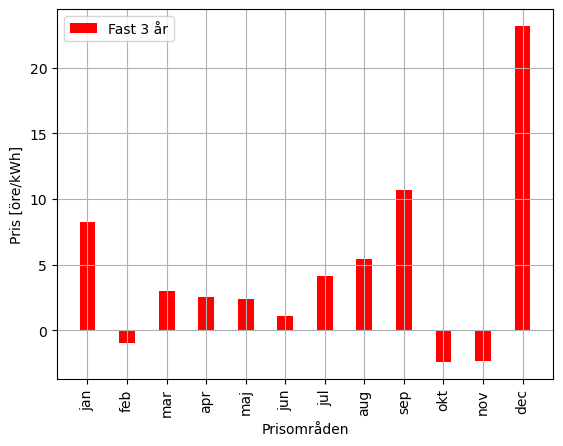

In [5]:
data = 'kundtyp data'
# V, L
print('Lägenhetskund (L) eller Villakund (V)?')
input2 = input()
# F1, F3, Rörlig = 1,2,3
print('Ange prisavtal (F1, F3, R):')
input3 = input()
# SE1, SE2, SE3, SE4 = 1,2,3,4
print('Ange prisområde (1-4):')
input4 = input()
print('Ange önskat årtal (2018-2023):')
input5 = input()
label_type = 'F1, F3 eller R'
# valt år, gör till int, ta bort 1, gör till sträng igen
input_last_year = str(int(input5)-1)
list_year = []
list_prices = []
december_price = []
list_ff = []
months = []
stat_bar = []

# Tilldelar data beroende av användares val
if input2 == 'V':
    data = read_file('villapriser.csv')
elif input2 == 'L':
    data = read_file('lghpriser.csv')

# ändrar input2 (typ) beroende av input till integer
if input3 == 'F1':
    input3 = 1
    label_type = 'Fast 1 år'
elif input3 == 'F3':
    input3 = 2
    label_type = 'Fast 3 år'
elif input3 == 'R':
    input3= 3
    label_type = 'Rörlig'
    
# itererar data (lista) för föregående år för att ta sista raden (december)
for lines in data:
    if lines[0] == input_last_year:
        december_price = lines

# kollar så december_price inte är en tom lista 
if len(december_price):
    list_year.append(december_price)    


# Iterar genom datan/csv, lägger in första tre bokstäver av månader i months, lägger in element för året i list_year
for lines in data:
    if lines[0] == input5:
        months.append(lines[1][0:3])
        list_year.append(lines)
# Tar bort januari månad om valda året var 2018
if input_last_year == '2017':
    months.remove('jan')
    
# Iterar list_year, beräknar ff och lägger in i listan list_prices
for lines in list_year:
    if input3 and input4:
        type_numb = int(input3)
        area_numb = int(input4)
        # Räknar ut korrekt index nr 
        i = (-1 +(area_numb *3))+(-1+type_numb)
        list_prices.append(float(lines[i]))  
i = 0
# loopar # längden av list_prices. beräknar ff genom # elementet i list_prices
while i < len(list_prices):
    if i != 0:
        stat_bar.append(i)
        x = list_prices[i]
        y = list_prices[i-1]
        z = 100
        result_ff = ((x - y) / y) * z
        list_ff.append(round(result_ff,2))
    i = i + 1

# Egenskaper diagram
width = 0.4
# använder bredd från width. Label (etikett) = label_type
plt.bar(stat_bar, list_ff, width=width, color='red', label=label_type)
plt.xlabel('Prisområden')
plt.ylabel('Pris [öre/kWh]')
plt.grid()
plt.xticks(stat_bar,months)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

## Deluppgift 5
Ev. kommentar:

Ange prisavtal (F1, F3, R): 
R
Lägsta-, högsta- och medelvärden av elpriserna under tidsperioden 2018-2023 för rörligt avtal

Omr.    lägsta      år       mån      högsta       år      mån      medel
----------------------------------------------------------------------------
Kategori lägenhetskund:
SE1     35.28      2020       apr     303.96      2022       dec     85.36
SE2     34.66      2020       apr     305.86      2022       dec     86.17
SE3     37.81      2020       jul     394.88      2022       dec    111.66
SE4     45.42      2020       maj     426.37      2022       aug    125.15
Kategori villakund:
SE1     17.82      2020       apr     284.43      2022       dec     68.01
SE2     17.58      2020       apr     286.79      2022       dec     68.87
SE3     21.72      2020       jul     375.08      2022       dec     94.37
SE4     28.68      2020       maj     409.09      2022       aug    107.67
----------------------------------------------------------------------------


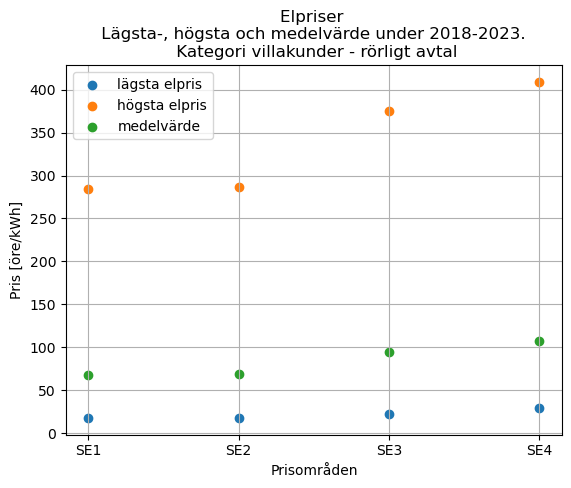

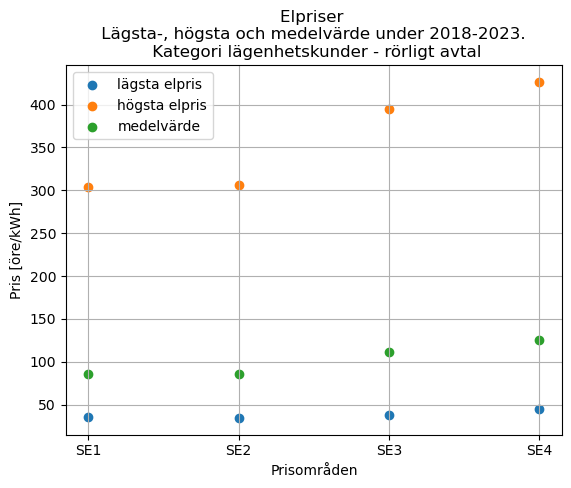

In [6]:
# Listor och andra variabler
min_list = []
min_months = []
min_years = []
max_list = []
max_months = []
max_years = []
avg_list = []
data_lgh = read_file('lghpriser.csv')
data_villa = read_file('villapriser.csv')
omr = ['SE1', 'SE2', 'SE3', 'SE4']
deal = 'Fast 1år, Fast 3år eller Rörligt'
print('Ange prisavtal (F1, F3, R): ')
input1 = input()
# för index nummer 
month_i = 1
year_i = 0
# index nummer för att plocka ut rätt data (kolumner)
i_1 = 0
i_2 = 0
i_3 = 0
i_4 = 0

# Om fast 1 år valt
if input1 == 'F1':
    # kolumn 2, 5, 8, 11
    i_1 = 2
    i_2 = 5
    i_3 = 8
    i_4 = 11
    deal = 'fast 1år avtal'
# Om fast 3 år valt
elif input1 == 'F3':
    # kolumn 3, 6, 9, 12
    i_1 = 3
    i_2 = 6
    i_3 = 9
    i_4 = 12
    deal = 'fast 3år avtal'
# Om rörligt valt
elif input1 == 'R':
    # kolumn 4, 7, 10, 13
    i_1 = 4
    i_2 = 7
    i_3 = 10
    i_4 = 13
    deal = 'rörligt avtal'

# Raderar första raden (index) i listans data. (titlar)
del data_lgh[0]
del data_villa[0]

# Funktion som beräknar och lägger till min, max och medelvärde i respektive lista
def add_list_values(data, year_index, month_index, val_index):
    min_v = 1000
    min_month = 'månad'
    min_year = 'år'
    max_v = -1000
    max_month = 'månad'
    max_year = 'år'
    sum_value = 0
    count = 0
    avg_v = 0
    # Iterar genom data, varje rad
    for lines in data:
        line_val = float(lines[val_index])
        # Ta fram minsta värde i kolumn (val_index)
        if line_val < min_v:
            min_v = line_val
            min_month = lines[month_index]
            min_year = lines[year_index]
        # Ta fram max v'rde i kolumn (val_index)
        if line_val > max_v:
            max_v = line_val
            max_month = lines[month_index]
            max_year = lines[year_index]
    # Tar fram medelvärde i kolumn (val_index), lägger in alla i sum_value. ökar count med 1 för varje nr
        sum_value = sum_value + line_val
        count = count + 1
    avg_v = float(round((sum_value / count),2))
    # Lägg till i min_list, lägg till motsvarande mån i min_month_list, och år i min_year
    min_list.append(min_v)
    min_months.append(min_month)
    min_years.append(min_year)
    # Lägger till i max_list och motsvarande mån i max_months, år i max_years
    max_list.append(max_v)
    max_months.append(max_month)
    max_years.append(max_year)
    # Lägger till medelvärde i avg_list
    avg_list.append(avg_v)
# slut av funktion ----


# anropar funktion add_list_values, tar lgh_villa, year_i, month_i, i_# som argument
add_list_values(data_lgh, year_i, month_i, i_1)    
add_list_values(data_lgh, year_i, month_i, i_2)
add_list_values(data_lgh, year_i, month_i, i_3)    
add_list_values(data_lgh, year_i, month_i, i_4)    
# Skriv ut titlar för tabell
print('Lägsta-, högsta- och medelvärden av elpriserna under tidsperioden 2018-2023 för '+ deal)
print('') 
print('Omr.    lägsta      år       mån      högsta       år      mån      medel')
print('-'*76) 
# Skriv ut tabell för villakunder
print('Kategori lägenhetskund:')
i = 0
while i < 4:
    print(f'{omr[i]} {min_list[i]:>9} {min_years[i]:>9} {min_months[i][0:3]:>9} {max_list[i]:>10} {max_years[i]:>9} {max_months[i][0:3]:>9} {avg_list[i]:>9}')
    i = i +1
    
# "Tömmer" listor för återanvändning
min_list = []
min_months = []
min_years = []
max_list = []
max_months = []
max_years = []
avg_list = []
# anropar funktion add_list_values, tar lgh_villa, year_i, month_i, i_# som argument
add_list_values(data_villa, year_i, month_i, i_1)    
add_list_values(data_villa, year_i, month_i, i_2)
add_list_values(data_villa, year_i, month_i, i_3)    
add_list_values(data_villa, year_i, month_i, i_4)    
# Skriv ut tabell för villakunder 
print('Kategori villakund:')
i = 0
while i < 4:
    print(f'{omr[i]} {min_list[i]:>9} {min_years[i]:>9} {min_months[i][0:3]:>9} {max_list[i]:>10} {max_years[i]:>9} {max_months[i][0:3]:>9} {avg_list[i]:>9}')
    i = i +1 
print('-'*76)


# Diagram Villa. x-axel är omr (område) y-axel är min_list, max_list, avg_lista
plt.scatter(omr, min_list, label='lägsta elpris')
plt.scatter(omr, max_list, label='högsta elpris')
plt.scatter(omr, avg_list, label='medelvärde')
# Egenskaper för diagram
plt.title('Elpriser \n Lägsta-, högsta och medelvärde under 2018-2023. \n Kategori villakunder - '+ deal)
plt.xlabel('Prisområden')
plt.ylabel('Pris [öre/kWh]')
plt.legend(loc='best')
plt.grid()
plt.show()

#Diagram Lägenhet
# "Tömmer" listor för återanvändning
min_list = []
min_months = []
min_years = []
max_list = []
max_months = []
max_years = []
avg_list = []
# anropar funktion add_list_values, tar lgh_villa, year_i, month_i, i_# som argument
add_list_values(data_lgh, year_i, month_i, i_1)    
add_list_values(data_lgh, year_i, month_i, i_2)
add_list_values(data_lgh, year_i, month_i, i_3)    
add_list_values(data_lgh, year_i, month_i, i_4)
# Diagram egenskaper
plt.scatter(omr, min_list, label='lägsta elpris')
plt.scatter(omr, max_list, label='högsta elpris')
plt.scatter(omr, avg_list, label='medelvärde')
plt.title('Elpriser \n Lägsta-, högsta och medelvärde under 2018-2023. \n Kategori lägenhetskunder - '+ deal)
plt.xlabel('Prisområden')
plt.ylabel('Pris [öre/kWh]')
plt.legend(loc='best')
plt.grid()
plt.show()